# Create AN API 🔗
## ---------------------------

# API is nothing but used to communicate between two software.

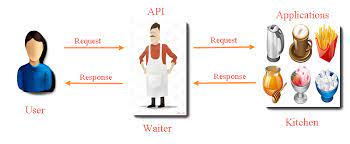

# Convert API data into DataFrame

# STEP FOLLOW
# Go to the TMDB website and login.
# Search TMDB API on google and jump into Movie Section("https://developers.themoviedb.org/3/movies/get-top-rated-movies") Get Top Rated and try in out section copy url.
# Open setting in TMDB and jump API section and create an API.

# API KEY 
https://api.themoviedb.org/3/movie/top_rated?api_key=3cd968810a1241900f76f8caae946412&language=en-US&page=1

# Open json Viewer ("http://jsonviewer.stack.hu/")  and paste all data that is come through the API.
# And select whatever data column required in you dataframe
## id title release_date overview popularity vote_average vote_count

# Working with an API ‍💻
## --------------------------------------

In [1]:
import pandas as pd 

In [2]:
import requests

In [3]:
response = requests.get("https://api.themoviedb.org/3/movie/top_rated?api_key=3cd968810a1241900f76f8caae946412&language=en-US&page=1")

In [4]:
response.json()["results"]

[{'adult': False,
  'backdrop_path': '/5hNcsnMkwU2LknLoru73c76el3z.jpg',
  'genre_ids': [35, 18, 10749],
  'id': 19404,
  'original_language': 'hi',
  'original_title': 'दिलवाले दुल्हनिया ले जायेंगे',
  'overview': 'Raj is a rich, carefree, happy-go-lucky second generation NRI. Simran is the daughter of Chaudhary Baldev Singh, who in spite of being an NRI is very strict about adherence to Indian values. Simran has left for India to be married to her childhood fiancé. Raj leaves for India with a mission at his hands, to claim his lady love under the noses of her whole family. Thus begins a saga.',
  'popularity': 23.459,
  'poster_path': '/2CAL2433ZeIihfX1Hb2139CX0pW.jpg',
  'release_date': '1995-10-20',
  'title': 'Dilwale Dulhania Le Jayenge',
  'video': False,
  'vote_average': 8.7,
  'vote_count': 3268},
 {'adult': False,
  'backdrop_path': '/iNh3BivHyg5sQRPP1KOkzguEX0H.jpg',
  'genre_ids': [18, 80],
  'id': 278,
  'original_language': 'en',
  'original_title': 'The Shawshank Redemp

In [5]:
pd.DataFrame(response.json()["results"]).head(1)

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/5hNcsnMkwU2LknLoru73c76el3z.jpg,"[35, 18, 10749]",19404,hi,दिलवाले दुल्हनिया ले जायेंगे,"Raj is a rich, carefree, happy-go-lucky second...",23.459,/2CAL2433ZeIihfX1Hb2139CX0pW.jpg,1995-10-20,Dilwale Dulhania Le Jayenge,False,8.7,3268


In [6]:
temp_df = pd.DataFrame(response.json()["results"])[["id","title","overview","release_date","popularity","vote_average","vote_count"]]

In [7]:
temp_df.head()

,id,title,overview,release_date,popularity,vote_average,vote_count
0,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",1995-10-20,23.459,8.7,3268
1,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,1994-09-23,61.283,8.7,20253
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,60.240,8.7,15161
3,724089,Gabriel's Inferno Part II,Professor Gabriel Emerson finally learns the t...,2020-07-31,10.444,8.7,1348
4,761053,Gabriel's Inferno Part III,The final part of the film adaption of the ero...,2020-11-19,25.938,8.6,908


# In this API there are total 471, we just retrive 1 page output so now we put this all process into loop. 

In [15]:
# Create Empty Dataframe
df = pd.DataFrame()
df

""


In [18]:
for i in range(1,472): # Last one excluded
    response = requests.get("https://api.themoviedb.org/3/movie/top_rated?api_key=3cd968810a1241900f76f8caae946412&language=en-US&page={}".format(i))
    temp_df = pd.DataFrame(response.json()["results"])[["id","title","overview","release_date","popularity","vote_average","vote_count"]]
    df = df.append(temp_df,ignore_index=True)

In [19]:
df.shape

(9403, 7)

In [22]:
df.head(1)

,id,title,overview,release_date,popularity,vote_average,vote_count
0,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",1995-10-20,23.459,8.7,3268


# Save Dataset To CSV

In [24]:
df.to_csv("top_rated_movie.csv")

In [27]:
pd.read_csv("top_rated_movie.csv").head(1)

,Unnamed: 0,id,title,overview,release_date,popularity,vote_average,vote_count
0,0,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",1995-10-20,23.459,8.7,3268


# Free API – Top 15 APIs You Can Use For Free (No Key Needed)
https://apipheny.io/free-api/